**Assignment No : 3**

**Title** :  
    Build the Image classification model by dividing the model in following Four stages:\
        a. Loading and preprocessing the image data\
        b. Defining the model’s architecture\
        c. Training the model\
        d. Estimating the model’s performance\
        
**Dataset :** mnist dataset

**Name** : Komal P. Badhe

**Roll No** : 20013069

**Class** : BE-IT

**Importing the required libraries**

In [1]:

from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

**Step 1 - Load the dataset**

In [2]:
# Train and test split
# Train data sample is used for training (fit function)
# Test sample is used for testing (validating) the model
(trainX,trainy),(testX,testy) = mnist.load_data()

In [3]:
print(trainX.shape, trainy.shape)

(60000, 28, 28) (60000,)


In [4]:
print(testX.shape,testy.shape)

(10000, 28, 28) (10000,)


In [5]:
trainX[:10]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
trainy[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

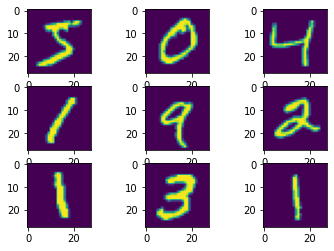

In [7]:
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(trainX[i])
plt.show()

In [8]:
# Encoding
# Label Encoder 
  # Red, Green, Blue
  # Red = 0
  # Green = 1
  # Blue = 2
# One Hot Encoder
# Red Blue  Green
# 1    0     0
# 0    1     0
# 1    0     0
# 0    0     1
# How many classes do we have ? -- 10 classes
trainy = to_categorical(trainy)
testy = to_categorical(testy)

In [9]:
  # reshape the data to have a single channel
  trainX = trainX.reshape((trainX.shape[0],28,28,1))
  testX = testX.reshape((testX.shape[0],28,28,1))

  # normalize the values

  trainX = trainX/255.0
  testX = testX/255.0


**Step 2 - Building a model**

In [10]:

def define_model():
  model = Sequential()
  model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',input_shape=(28,28,1)))
  model.add(MaxPooling2D((2,2)))
  model.add(Flatten())
  model.add(Dense(100,activation='relu',kernel_initializer='he_uniform'))
  model.add(Dense(10,activation='softmax'))
  opt = SGD(momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])
  return model

In [11]:

def summarize_performance(scores):
  print("Accuracy: \nMean Score:",mean(scores),"\nStd:",std(scores)*100)

**Displaying random image from dataset**

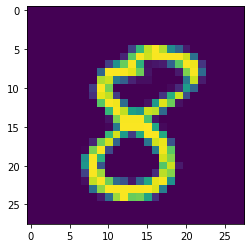

In [12]:
import random
index = random.randint(1,10000)
plt.imshow(testX[index])

**Step 3 - Training the model**

In [13]:
model = define_model()
model.fit(trainX,trainy,epochs=10,batch_size=32, validation_data=(testX,testy))


Epoch 1/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.1678 - accuracy: 0.9486 - val_loss: 0.0643 - val_accuracy: 0.9807
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0591 - accuracy: 0.9821 - val_loss: 0.0533 - val_accuracy: 0.9826
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0384 - accuracy: 0.9887 - val_loss: 0.0431 - val_accuracy: 0.9865
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0274 - accuracy: 0.9916 - val_loss: 0.0419 - val_accuracy: 0.9853
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0192 - accuracy: 0.9942 - val_loss: 0.0447 - val_accuracy: 0.9845
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0135 - accuracy: 0.9961 - val_loss: 0.0391 - val_accuracy: 0.9875
Epoch 7/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0097 - accuracy: 0.9973 - val_loss: 0.0371 -

313/313 [==============================] - 2s 6ms/step


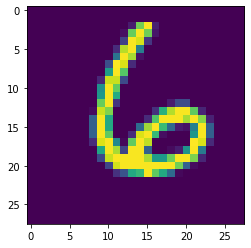

In [14]:
y_op = model.predict(testX) 

import random 
index = random.randint(1,10000) 
plt.imshow(testX[index]) 

In [15]:
pred_num = max(y_op[index]) 
for i in range(len(y_op[index])): 
    if(y_op[index][i] == pred_num): 
        print("Predicted number is: ",i)
        break 

Predicted number is:  6


**Step 4- Evaluating the model**

In [16]:
 
  print(model.evaluate(testX,testy))

313/313 [==============================] - 2s 6ms/step - loss: 0.0394 - accuracy: 0.9879
[0.03939398005604744, 0.9879000186920166]
